# Solar System planets image classification
### Inteligencia Artirficial para los Sistemas de Control Autónomos
### Máster de Ciencia y Tecnología desde el Espacio


## Objectives

- Introduce some basic Machine Learning concepts.
- Work with a basic Machine Learning workflow.
- Illustrate an application of classical Machine Learning to image classification.
- Understand the importance of hyperparameter settings.

## Introduction

In this assignment we will implement a Computer Vision application of Machine Learning. We will train a classifier able to identify a planet of the Solar System given a picture of it. The main goal of this assignment is to implement a basic Machine Learning workflow and practice some tasks needed in any Machine Learning project, such as model training, model evaluation or hyperparameter optimization.

Remember that the workflow usually implemented in ML projects is as follows.

1. Data adquisition
2. Exploratory analysis
3. Data preprocessing
4. Model training
5. Model validation

This assignment uses a dataset created by Emirhan Bulut.

## Libraries import

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

## Load dataset

Given that the dataset is a collection of images, first we need to download them in order to build our feature matrix. To that end we use a nice feature of notebooks that allows to execute a system command. You do not need to know how the following command works, all you need is to know that it is going to download a zip file from Internet containing the images.

In [ ]:
!wget https://github.com/emirhanai/Planets-and-Moons-Dataset-AI-in-Space/raw/main/Planets_Moons_Data.zip

In [ ]:
!unzip Planets_Moons_Data.zip

Let's checkout if the dataset has been correctly downloaded.

In [ ]:
!ls -l

It would be better to visualize one of the images.

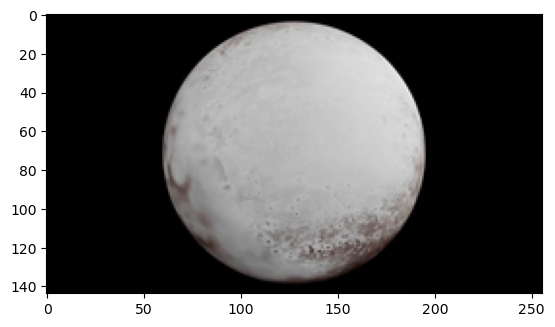

In [2]:
import os
import pandas as pd
import time
from tqdm.notebook import tqdm
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt

from PIL import ImageOps

DATAPATH = "Planets and Moons"

img = Image.open(os.path.join(DATAPATH, "Pluto/Pluto (100).jpg"))
img.load()
plt.imshow(img)

In [3]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

We can transform the image to a plain numpy array simply as.

In [4]:
np.asarray(img, dtype="uint8").shape

(144, 256, 3)

## Build the dataset

Given the collection of images, we need to extract the features to build the dataset. That is done in the following code, that you do not need to understand.

In [5]:
DATAPATH = "Planets and Moons"


columnNames = list()
columnNames.append('label')
size = 28 * 28 * 3

for i in range(size):
    pixel = str(i)
    columnNames.append('pixel' + pixel)

# Create a Pandas dataframe for storing data
df = pd.DataFrame(columns = columnNames)

for dirs in tqdm(os.listdir(DATAPATH)):
    print("Iterating: " + dirs + " folder")

    for file in tqdm(os.listdir(os.path.join(DATAPATH, dirs))):
        #print("Doing " + file)
        img = Image.open(os.path.join(DATAPATH, dirs, file))
        img.load()

        border = (58, 2, 58, 2) # left, top, right, bottom
        img = ImageOps.crop(img, border)
        img = img.resize((28, 28))

        # create a numpy array for image pixels
        imgdata = np.asarray(img, dtype="uint8")
        #print(imgdata.shape)
        imgdata = imgdata.reshape(1, -1)
        row = pd.DataFrame(imgdata)
        row.columns = columnNames[1:] # First entry is 'label', avoid it
        row['label'] = dirs
        
        df = df.append(row)

  0%|          | 0/11 [00:00<?, ?it/s]

Iterating: MakeMake folder


  0%|          | 0/149 [00:00<?, ?it/s]

Iterating: Jupiter folder


  0%|          | 0/149 [00:00<?, ?it/s]

Iterating: Mars folder


  0%|          | 0/149 [00:00<?, ?it/s]

Iterating: Mercury folder


  0%|          | 0/149 [00:00<?, ?it/s]

Iterating: Moon folder


  0%|          | 0/148 [00:00<?, ?it/s]

Iterating: Uranus folder


  0%|          | 0/149 [00:00<?, ?it/s]

Iterating: Neptune folder


  0%|          | 0/149 [00:00<?, ?it/s]

Iterating: Pluto folder


  0%|          | 0/149 [00:00<?, ?it/s]

Iterating: Earth folder


  0%|          | 0/149 [00:00<?, ?it/s]

Iterating: Venus folder


  0%|          | 0/149 [00:00<?, ?it/s]

Iterating: Saturn folder


  0%|          | 0/149 [00:00<?, ?it/s]

The variable df contains a dataframe with the images in a Machine Learning friendly format. The process of building the dataset may be time-consuming in case of large amount of data. For this reason it is quite common to store it in disk.

In [ ]:
df.to_csv("planets.csv", index=False)

This file has been created in the virtual machine, so you do not have direct access to it, but you can still download it with the following code.

In [6]:
from IPython.display import FileLink

display(FileLink("planets.csv"))

/home/david/repositorios/docencia/dataCourse/assignments/planets/planets.csv

## Exploratory analysis

As usual, we try to identify NaN and null values, number of instances, attributes and classes, outlayers, correlations and in general any information about our data that helps us to better understand it and hence train better models. You may be interested (and you certainly should be) in taking a look at the images, download them [from this link](https://github.com/dfbarrero/dataCourse/raw/master/assignments/planets/Planets_Moons_Data.zip).

In [7]:
## THIS EDA IS AN EXERCISE
## YOUR CODE HERE

The conclusion should be that the dataset is perfecty balanced with 11 classes, clean, without outlayers and valid for predictive modeling.

## Preprocess data

Our data have values between 0 and 255, which is not optimal for some of the algorithms we will try, so we normalize them. In this case the variance of our attributes is quite similar, if not identical, so normalization will not make a big difference, however, we will do it, but before that we build the feature matrix and target vector as Scikit-Learn requires.

In [8]:
x = df.drop("label", axis=1)
y = df["label"]

display(x.head())
display(y.head())

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0    MakeMake
0    MakeMake
0    MakeMake
0    MakeMake
0    MakeMake
Name: label, dtype: object

Now we standarize our data.

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)
X = scaler.transform(x)

X

array([[-0.31633394, -0.31633394, -0.31633394, ..., -0.31633394,
        -0.31633394, -0.31633394],
       [-0.31633394, -0.31633394, -0.31633394, ..., -0.31633394,
        -0.31633394, -0.31633394],
       [-0.31633394, -0.31633394, -0.31633394, ..., -0.31633394,
        -0.31633394, -0.31633394],
       ...,
       [ 3.16121632,  3.16121632,  3.16121632, ...,  3.16121632,
         3.16121632,  3.16121632],
       [ 3.16121632,  3.16121632,  3.16121632, ...,  3.16121632,
         3.16121632,  3.16121632],
       [ 3.16121632,  3.16121632,  3.16121632, ...,  3.16121632,
         3.16121632,  3.16121632]])

We split our data into train and test datasets.

In [11]:
from sklearn.model_selection import train_test_split 
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f"X shape: {X.shape}")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X shape: (1638, 2352)
X_train shape: (1146, 2352)
X_test shape: (492, 2352)


## Predictive modelling

### Set up a baseline

In order to assess correctly our model, we first need something to compare with. Absolute metrics have little meaning without a context. To this end it is quite common to apply a dumb forecasting just to have an estimation of the magnitude of the metrics. In our case we will always predict the most frequent class.

In [12]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
y_model = dummy_clf.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_model)

0.07926829268292683

In [14]:
y_model[:10]

array(['Earth', 'Earth', 'Earth', 'Earth', 'Earth', 'Earth', 'Earth',
       'Earth', 'Earth', 'Earth'], dtype='<U5')

This dummy classifier always classifies its input as 'Earth'. Now we are going to train several types of classifiers trying to improve our baseline accuracy; this is a standard practice in Machine Learning, remember that the No Free Lunch Theorem says that *a priori* we do not know which learning algorithm will perforn better. 

We will use accuracy as metric, given that it is a pretty standard classification task with a balanced dataset.

#### K-NN classifier

Model fit:

In [15]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)                  
y_model = model.predict(X_test)             

Model evaluation:

In [16]:
from sklearn.metrics import accuracy_score

results = {}

results['knn'] = accuracy_score(y_test, y_model)
results['knn']

0.9878048780487805

#### Support Vector Machine (SVM) classifier

In [17]:
from sklearn.svm import SVC

model = SVC()

model.fit(X_train, y_train)                   
y_model = model.predict(X_test)              

In [18]:
results['svm'] = accuracy_score(y_test, y_model)
results['svm']

0.9491869918699187

#### Classification tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)          
y_model = model.predict(X_test)              

In [20]:
results['tree'] = accuracy_score(y_test, y_model)

Finally, we compare the accuracy of our models:

In [21]:
results

{'knn': 0.9878048780487805,
 'svm': 0.9491869918699187,
 'tree': 0.983739837398374}

# Exercises

### Initial steps

1. Understand the workflow implemented in this notebook. You do not need to understand the details of the code but of course it is better if you can understand it. 

2. Complete this notebook filling in the EDA section.

### Cross-validation

3. The validation done above, depending on the size of the dataset and its properties, may not be very reliable. Evaluate the three previous classifiers with 10-folders cross validation and fill the following table and think about to what extend you are free to select any number of folds in cross validation.

| Model | Accuracy | Accuracy (10-CV) |
| ---   | --- | --- | 
| Baseline   |     |    | 
| KNN   | | |
| SVM   | | |
| Tree  | | |

KNN

SVM

Tree

4. Now compare the standard deviation of the accuracy estimated with cross validation for different number of folds (5 and 10). Fill out the following table and try to identify any pattern.

| Model | $\sigma$ (cv=10) | $\sigma$ (cv=5) |
| ---   | --- | --- |
| KNN   |     |     |
| SVM   | | | 
| Tree  | | |

KNN

SVM

Tree

### Alternative evaluation methods

5. Display the confusion matrix for the tree models trained with the train dataset. Do they fail/success in the same way?

KNN

SVM

Tree

6. Scikit-Learn comes with a handy function named classification_report, that provides a range of evaluation metrics for classifiers. Search information about this function and provide a report the SVM classifier.

### Hyper parameter optimization

7. Train a KNN model for different values of *n_neighbors* and plot its accuracy.

8. Train a SVM classifier for different values of *C* and plot its accuracy. Search in Internet which values of C are reasonable.

9. Train a classification tree for diferent values of *max_depth* and plot its accuracy. This hyperparameter determines the maximun depth that is allowed to the learned tree.

### Predictions on new data

We train models because we want to use them with data that does not belong to our dataset. We first train a production model evaluating its performance using the best scoring configuration we have seen so far, which is a 1-NN classifier (KNN with K=1).

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

model = KNeighborsClassifier(n_neighbors=1)

print(f"5-CV accuracy estimation: {cross_val_score(model, X, y, cv=5).mean()}")

5-CV accuracy estimation: 0.997555381517118


We've got a 99'7% accuracy! It seeems that our model is almost perfect, so we move on to put it into production, to this end we train it with the whole dataset for best performance.

In [27]:
model.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

That's nice, we finally have our model ready for fun. Now it is time to download an image.

In [29]:
from PIL import Image
import requests
from io import BytesIO

url = 'https://github.com/dfbarrero/dataCourse/raw/master/assignments/planets/earth.jpg'

response = requests.get(url)
img = Image.open(BytesIO(response.content))

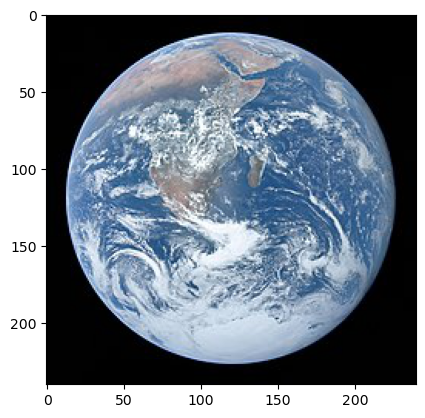

In [30]:
plt.imshow(img)

Good, now we have to preprocess the image to make our classifier happy.

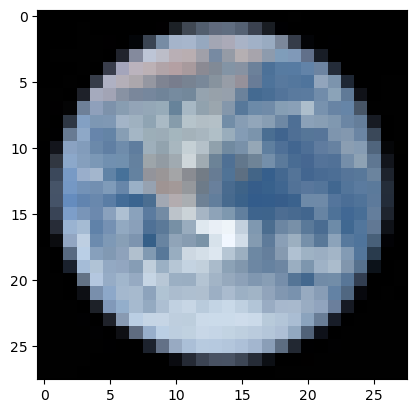

In [31]:
from PIL import ImageOps

border = (58, 2, 58, 2) # left, top, right, bottom
imgprocessed = ImageOps.crop(img, border)
imgprocessed = img.resize((28, 28))

plt.imshow(imgprocessed)

OK, the image has the format we wanted, but it is not still the NumPy array that out model expects. Let's do it.

In [34]:
imgdata = np.asarray(imgprocessed, dtype="uint8")
print(imgdata.shape)
imgdata = imgdata.reshape(1, -1)
print(imgdata.shape)

row = pd.DataFrame(imgdata, columns=['pixel'+str(i) for i in range(size)])
row_scaled = scaler.transform(row) # remember that we trained our models with standarized data

(28, 28, 3)
(1, 2352)


In [35]:
model.predict(row.values)

array(['Saturn'], dtype=object)

10. Observe that despite having a classifier with 99% accuracy, it classifies 'Earth' as 'Saturn'. So bad!. How do you explain this bad behaviour?